In [34]:
%%html
<style> table { display: inline-block } </style>

# CAB420 Assigment 2 - Model 1

| Name   | Student Number |
| :---   | :--- |
| Charmi Raval       | N10510702          |
| Leonardo Villamil  | N10411526          |
| Litian Chen        | N9646922           |
| Tace Stewart       | N9654411           |

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.models import Model

## Load Data

In [36]:
# Load data
train = pd.read_csv ('Data/training.csv')
validation = pd.read_csv ('Data/validation.csv')
test = pd.read_csv ('Data/testing.csv')

In [37]:
# Split path, features and label

X_train = train.drop(['filename', 'accent'], axis=1)
path_train = train['filename'].to_numpy()
y_train = train['accent'].to_numpy()

X_val = validation.drop(['filename', 'accent'], axis=1)
path_val = validation['filename'].to_numpy()
y_val = validation['accent'].to_numpy()

X_test = test.drop(['filename', 'accent'], axis=1)
path_test = test['filename'].to_numpy()
y_test = test['accent'].to_numpy()

In [38]:
# Encode strings into class numbers
labels = np.unique(y_train)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

In [39]:
# Helper function base on the one made in the lecture examples

# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the training data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, labels):
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test= model.predict(X_test)
    print('Training Accuracy: ' + str(sum(pred_train == Y_train)/len(Y_train)))
    print('Validation Accuracy: ' + str(sum(pred_val == Y_val)/len(Y_val)))
    print('Testing Accuracy: ' + str(sum(pred_test == Y_test)/len(Y_test)))

    #print('Confusion Matrix - Testing')
    cm = confusion_matrix(Y_train, pred_train, normalize='true')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax);
    c.ax_.set_title('Training Set Performance')

    #print('Confusion Matrix - Testing')
    cm = confusion_matrix(Y_val, pred_val, normalize='true')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax);
    c.ax_.set_title('Validation Set Performance')

    #print('Confusion Matrix - Testing')
    cm = confusion_matrix(Y_test, pred_test, normalize='true')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax);
    c.ax_.set_title('Testing Set Performance')

    print('\nClassification Report on Testing Set\n')
    print(classification_report(Y_test, pred_test))   



In [40]:
# Start with some basic parameters
cknn = KNeighborsClassifier(n_neighbors=10, weights = 'distance')
cknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

Training Accuracy: 1.0
Validation Accuracy: 0.4818038240532276
Testing Accuracy: 0.48634026681004067

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.37      0.05      0.09       465
           1       0.39      0.08      0.13      1817
           2       0.00      0.00      0.00        53
           3       0.27      0.05      0.08      1682
           4       0.32      0.25      0.28      5455
           5       0.30      0.08      0.12       133
           6       0.36      0.14      0.20      2323
           7       0.39      0.04      0.07       357
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       384
          10       0.35      0.13      0.19      1632
          11       0.20      0.01      0.03       135
          12       0.35      0.03      0.05       386
          13       1.00      0.01      0.03        67
          14       0.00      0.00      0.00      

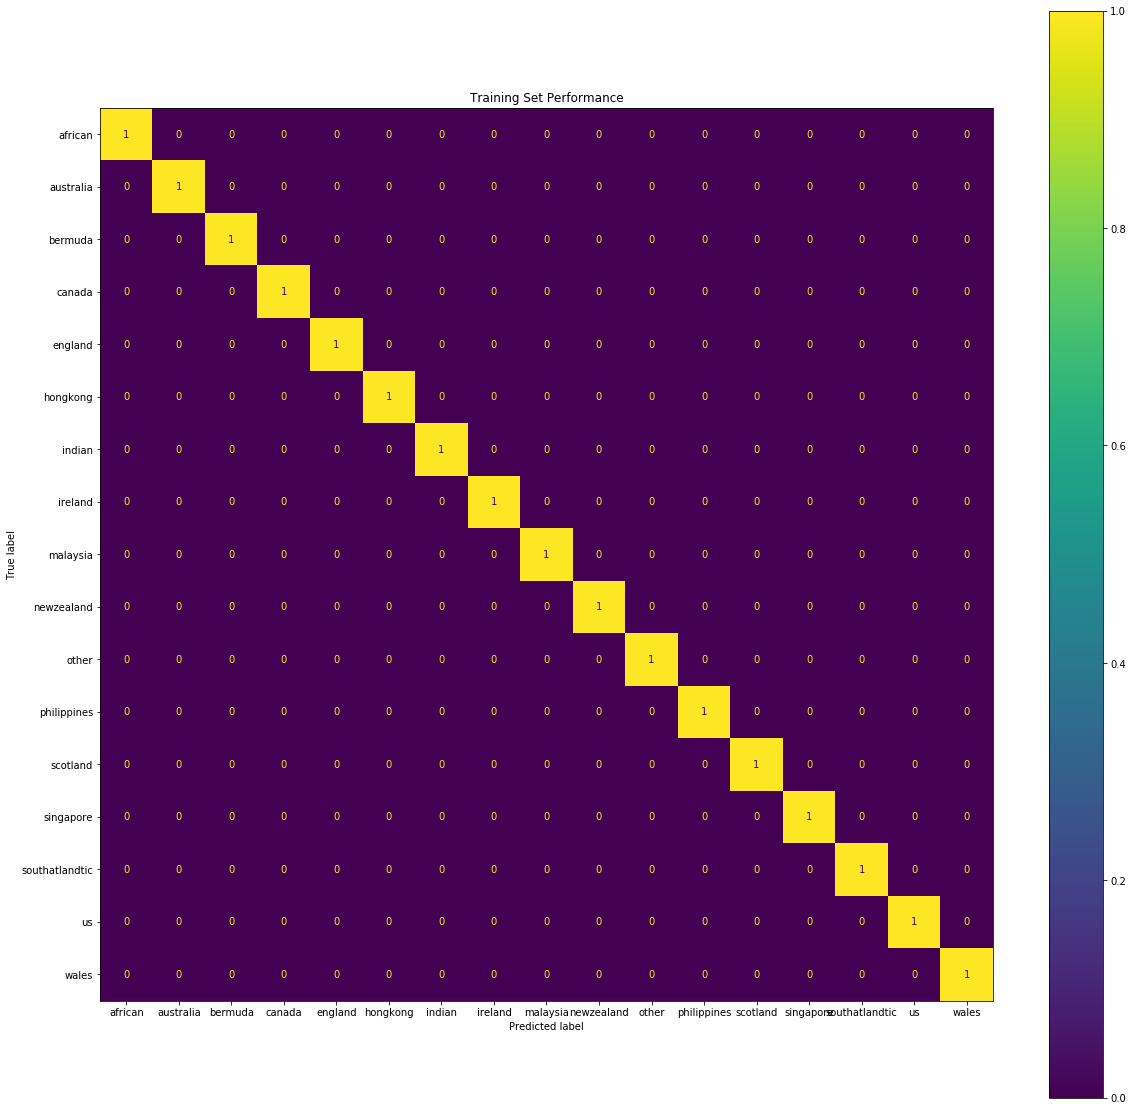

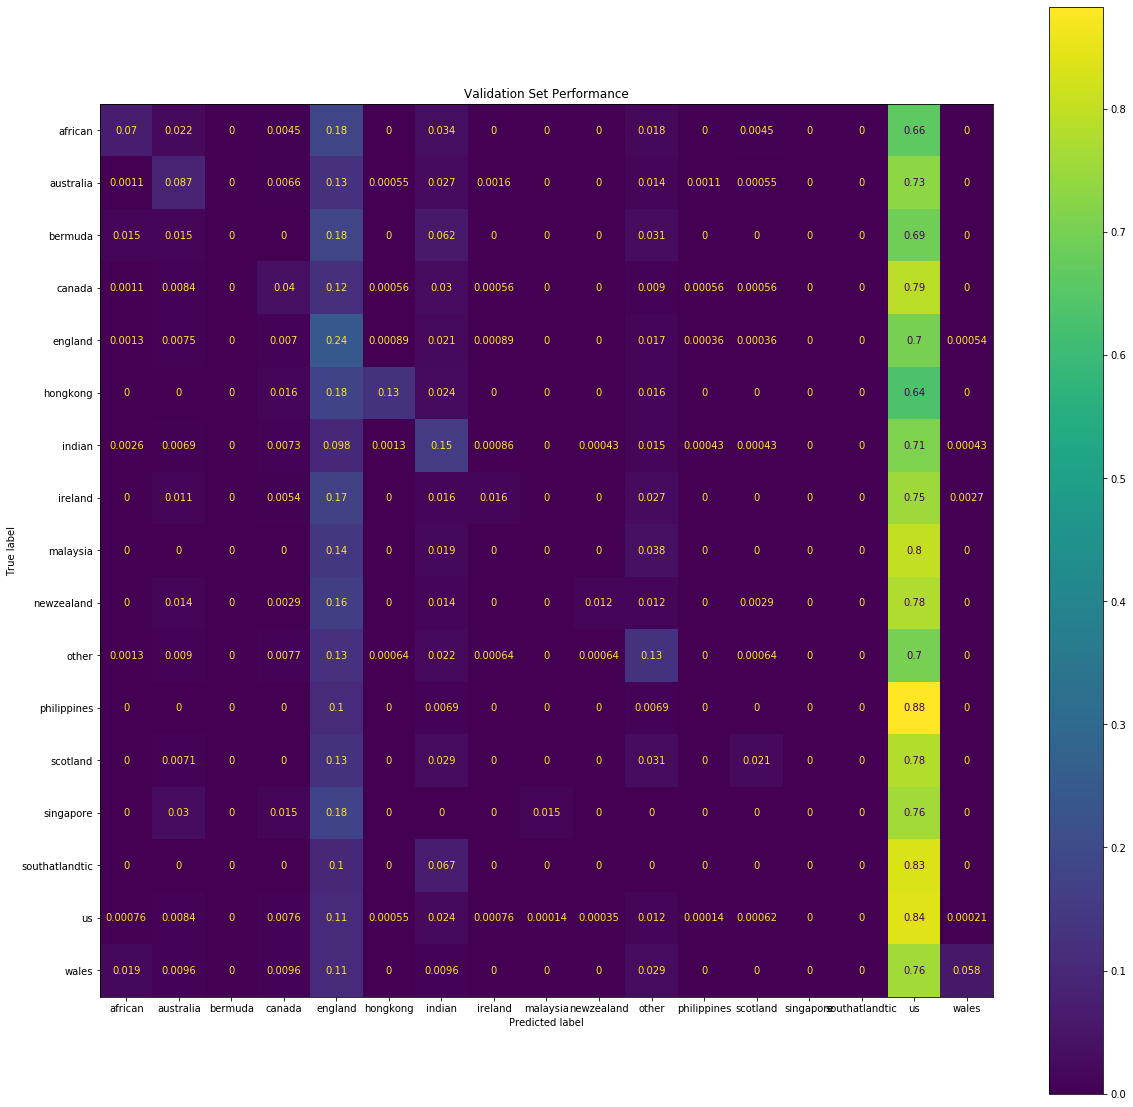

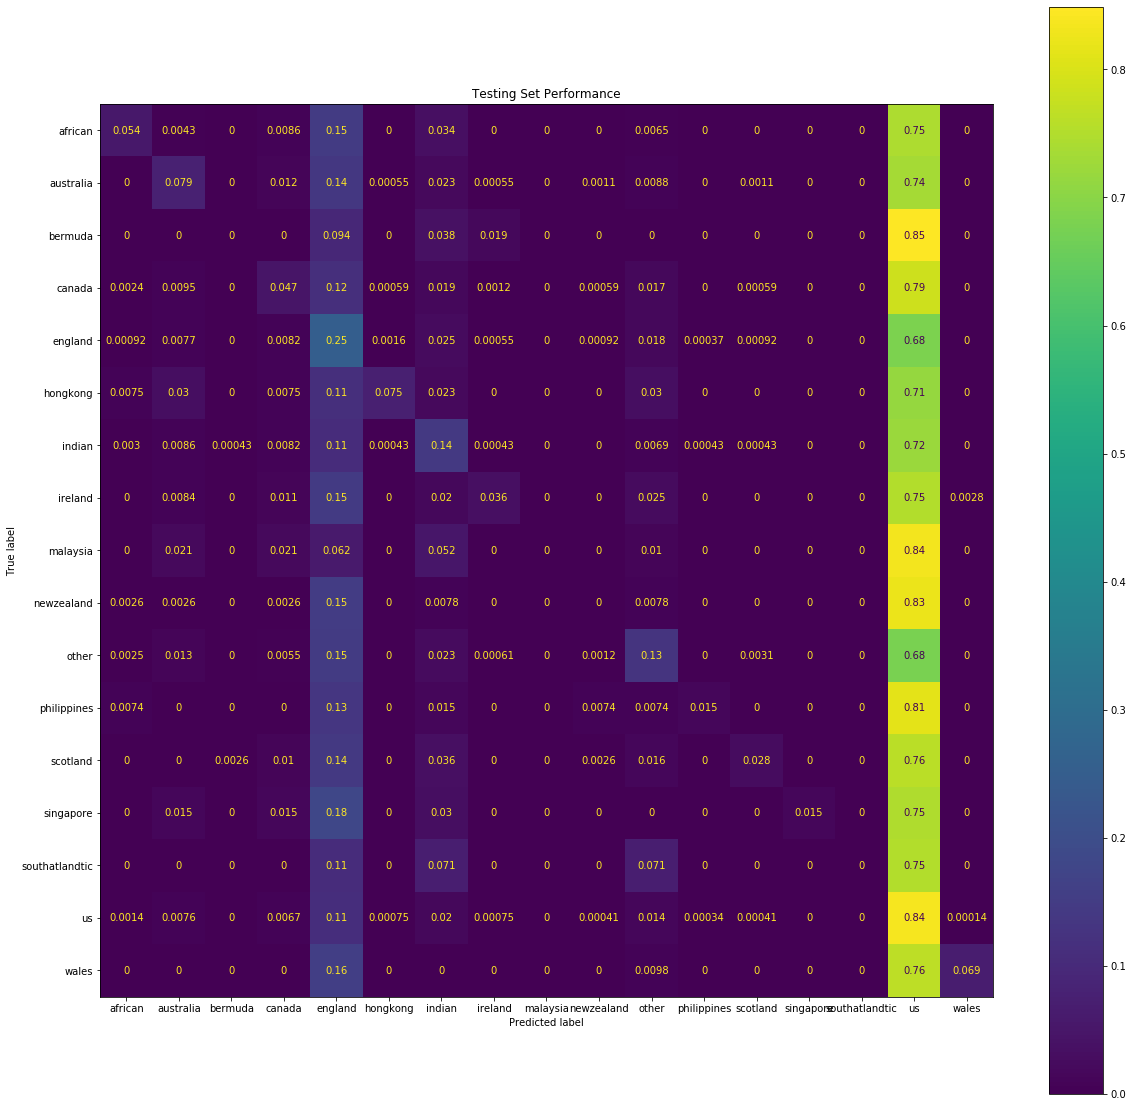

In [41]:
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)

Training Accuracy: 1.0
Validation Accuracy: 0.49400181457710274
Testing Accuracy: 0.502402634497127

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.40      0.03      0.05       465
           1       0.61      0.05      0.10      1817
           2       0.00      0.00      0.00        53
           3       0.49      0.02      0.04      1682
           4       0.36      0.19      0.25      5455
           5       0.29      0.05      0.09       133
           6       0.43      0.11      0.17      2323
           7       0.50      0.03      0.05       357
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       384
          10       0.43      0.09      0.15      1632
          11       1.00      0.01      0.01       135
          12       0.29      0.01      0.01       386
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00       

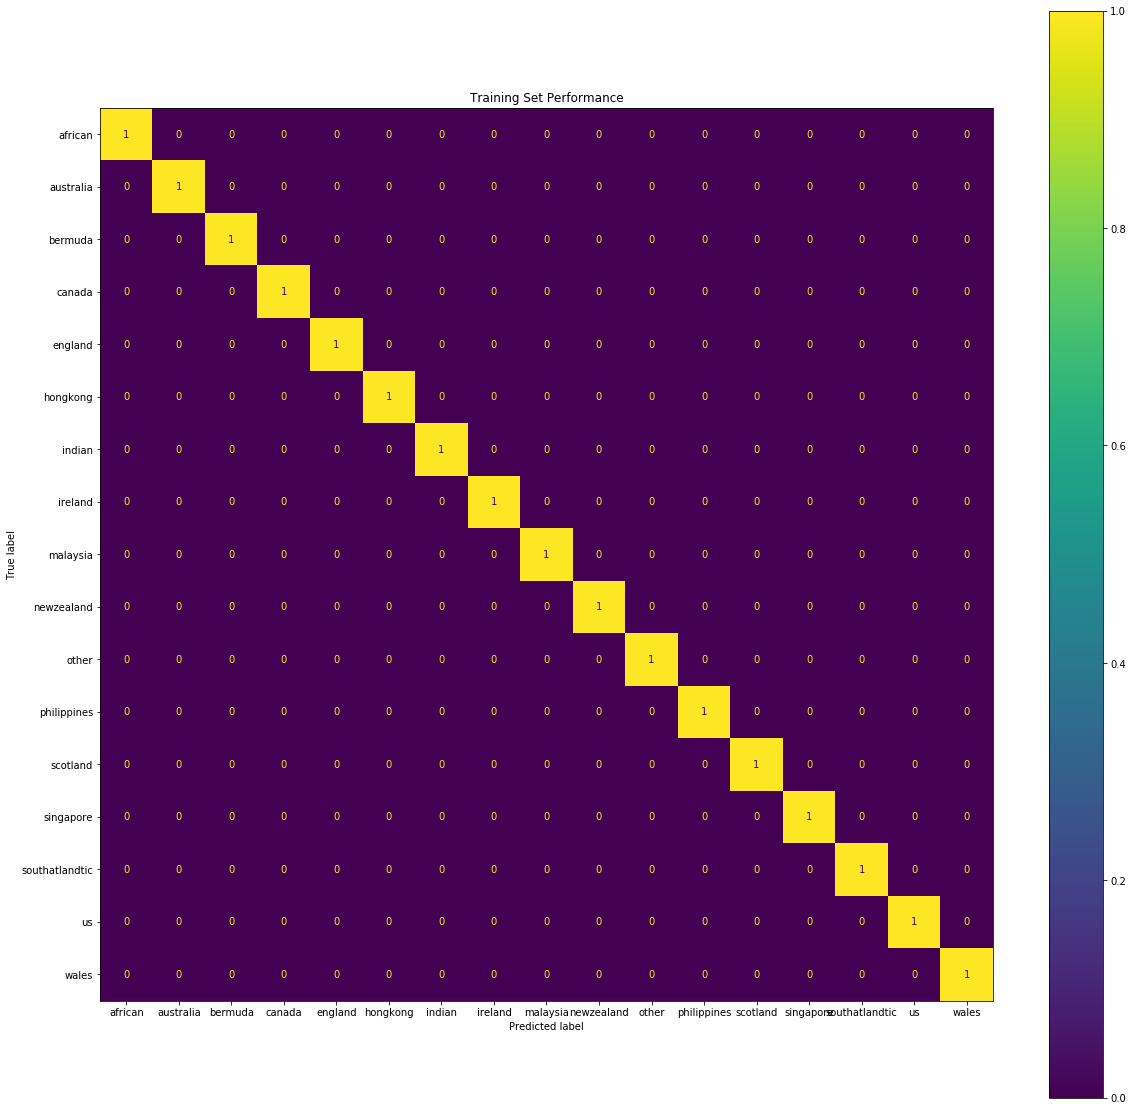

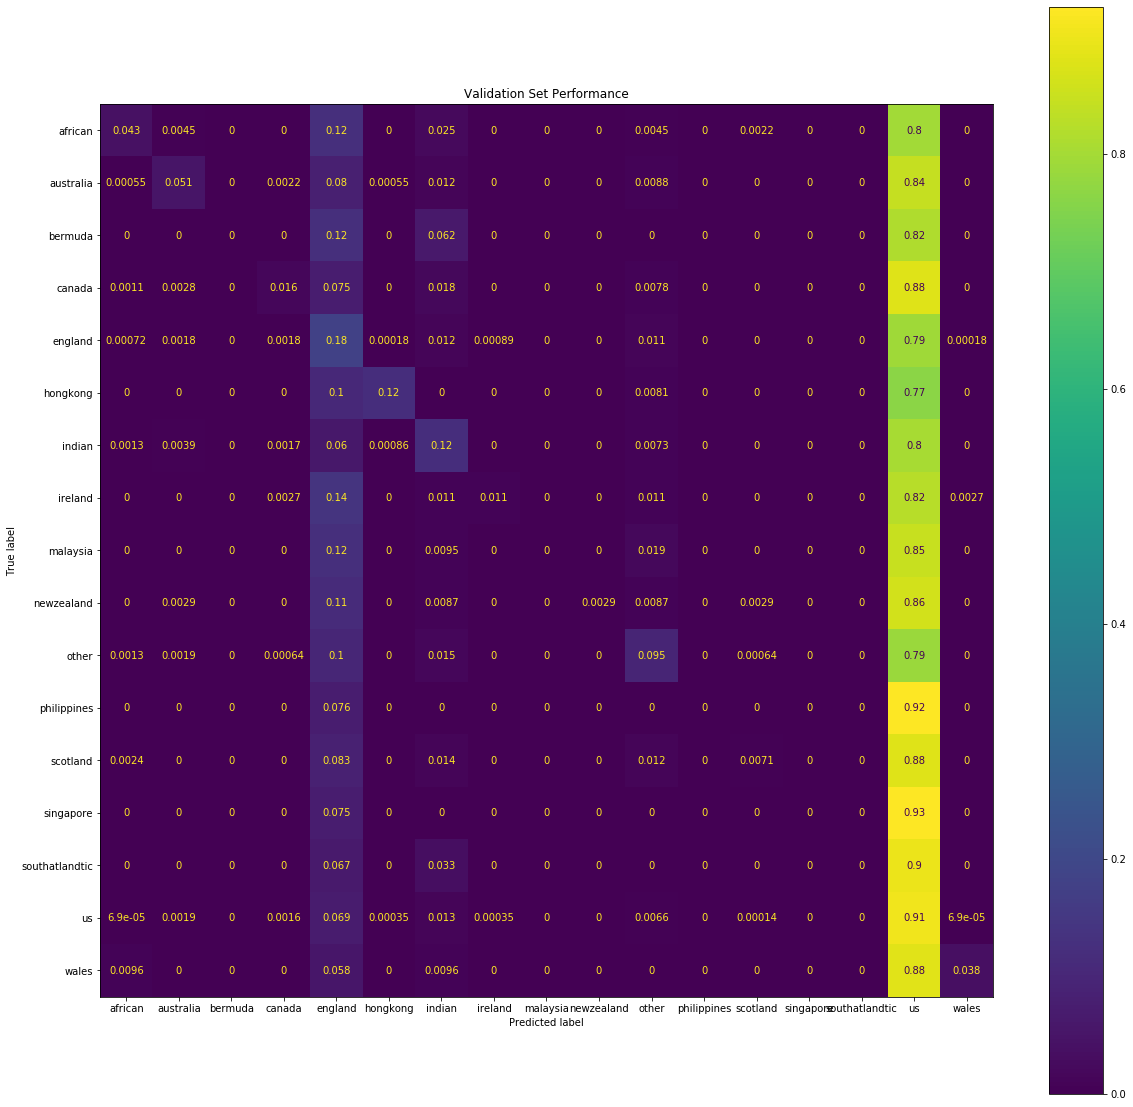

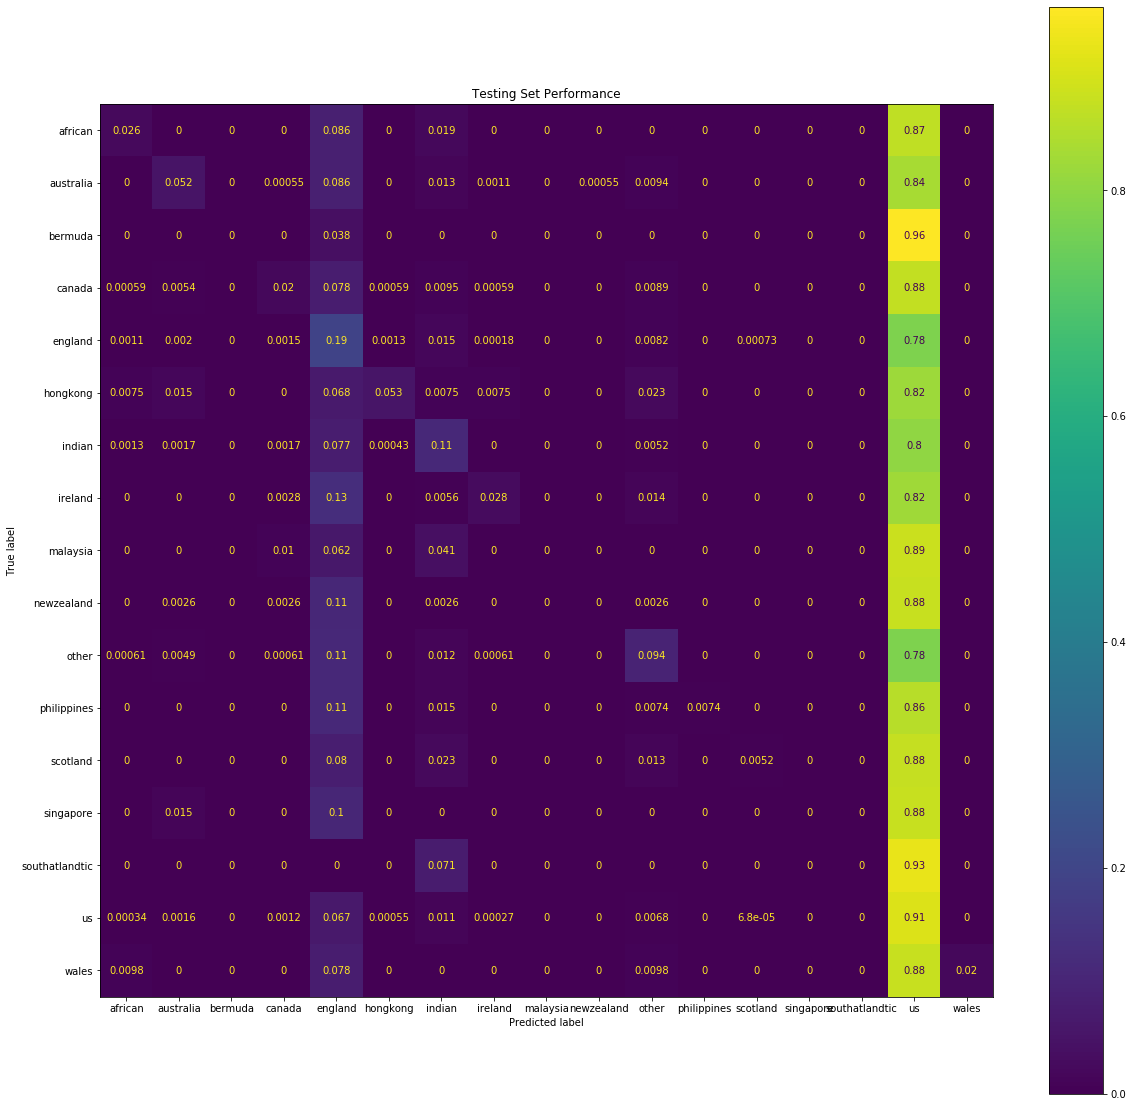

In [42]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=20, weights='distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)

Training Accuracy: 1.0
Validation Accuracy: 0.4992103229275177
Testing Accuracy: 0.5050572935918546

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.57      0.01      0.02       465
           1       0.77      0.04      0.07      1817
           2       0.00      0.00      0.00        53
           3       0.67      0.01      0.02      1682
           4       0.41      0.11      0.17      5455
           5       0.35      0.05      0.09       133
           6       0.53      0.07      0.13      2323
           7       0.54      0.02      0.04       357
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       384
          10       0.45      0.06      0.10      1632
          11       0.00      0.00      0.00       135
          12       0.00      0.00      0.00       386
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00       

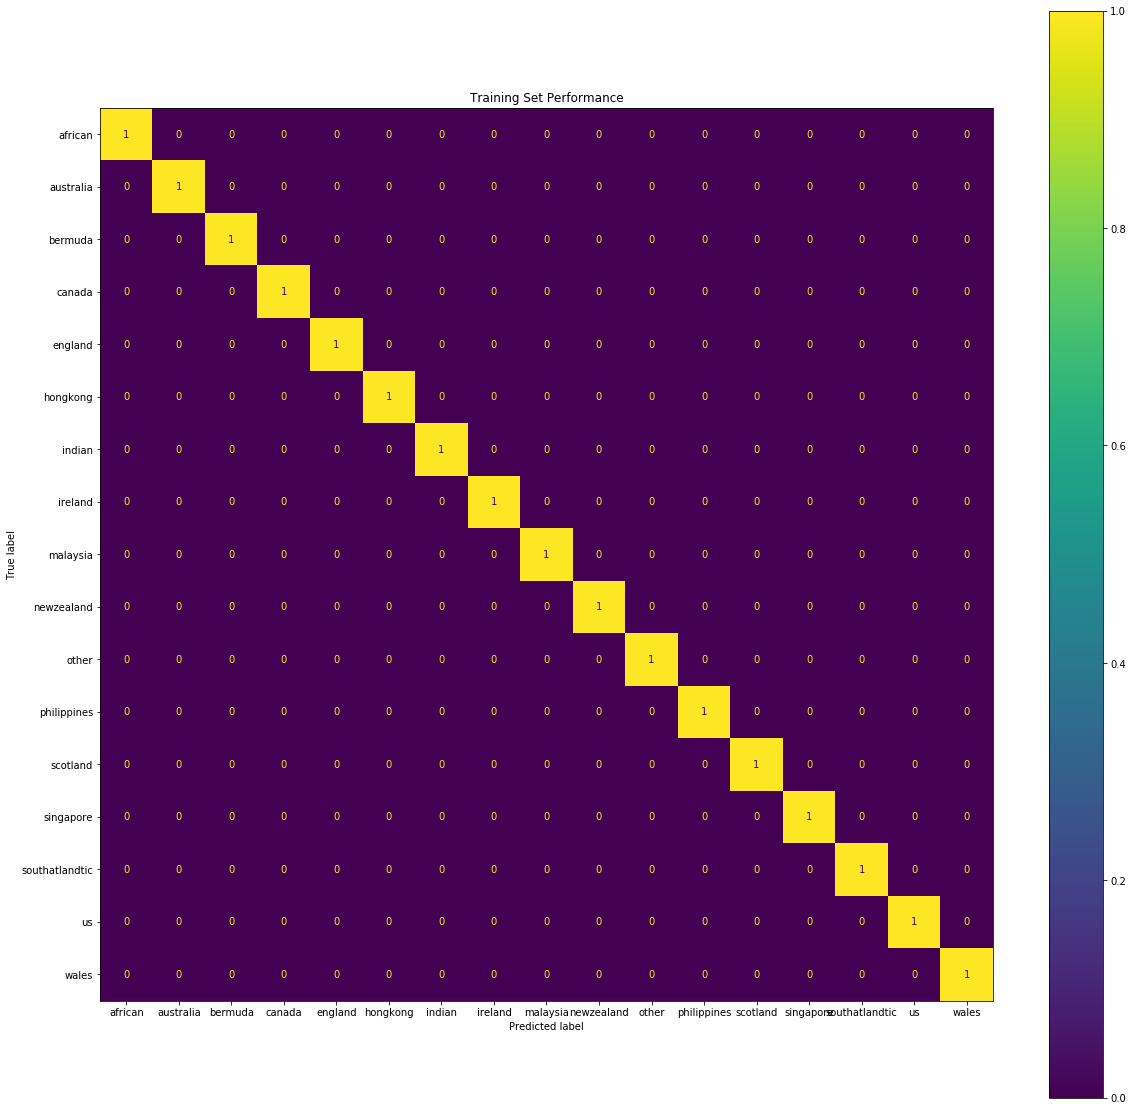

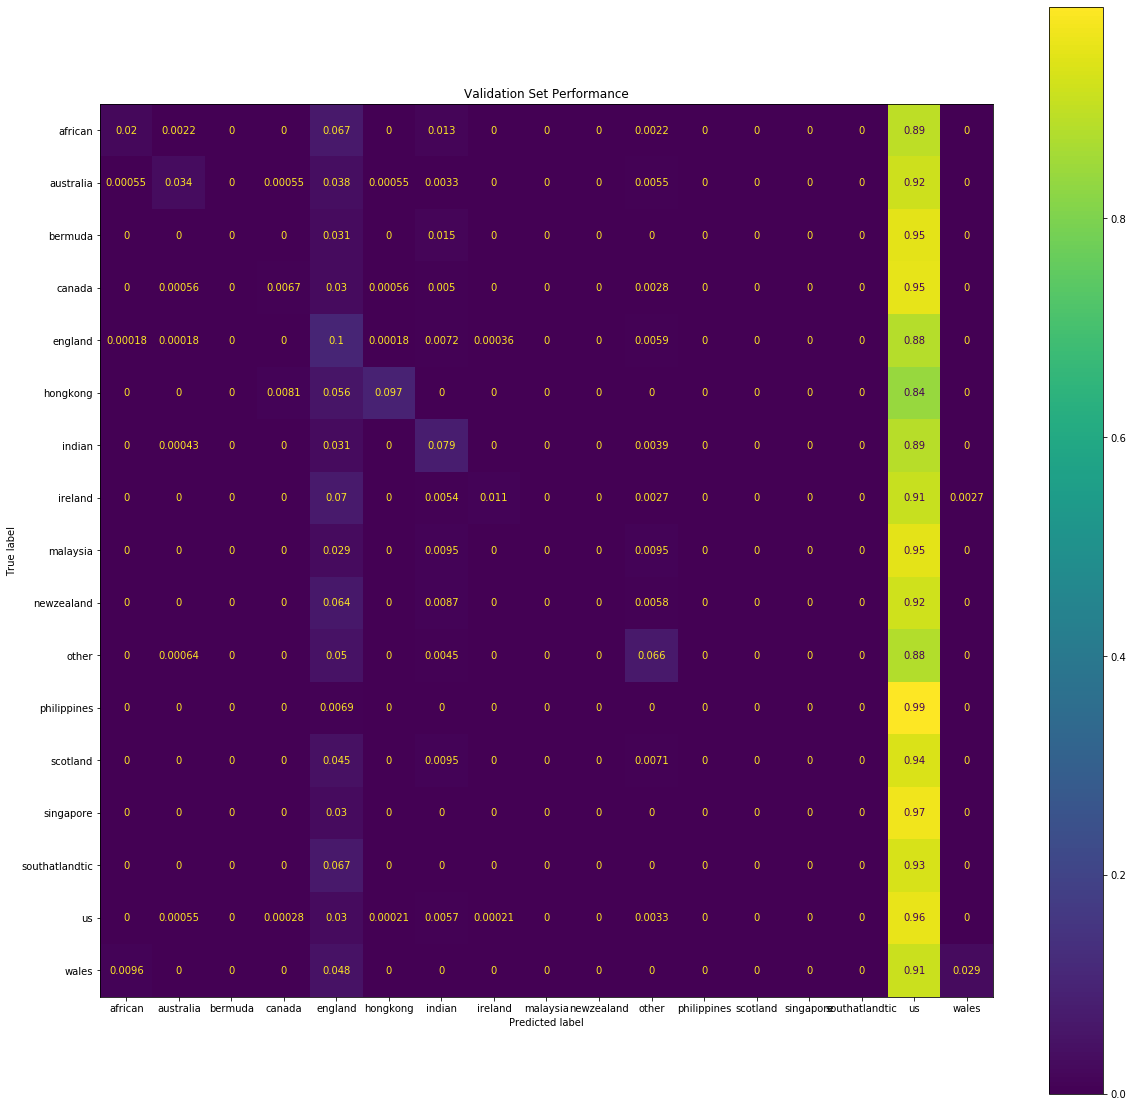

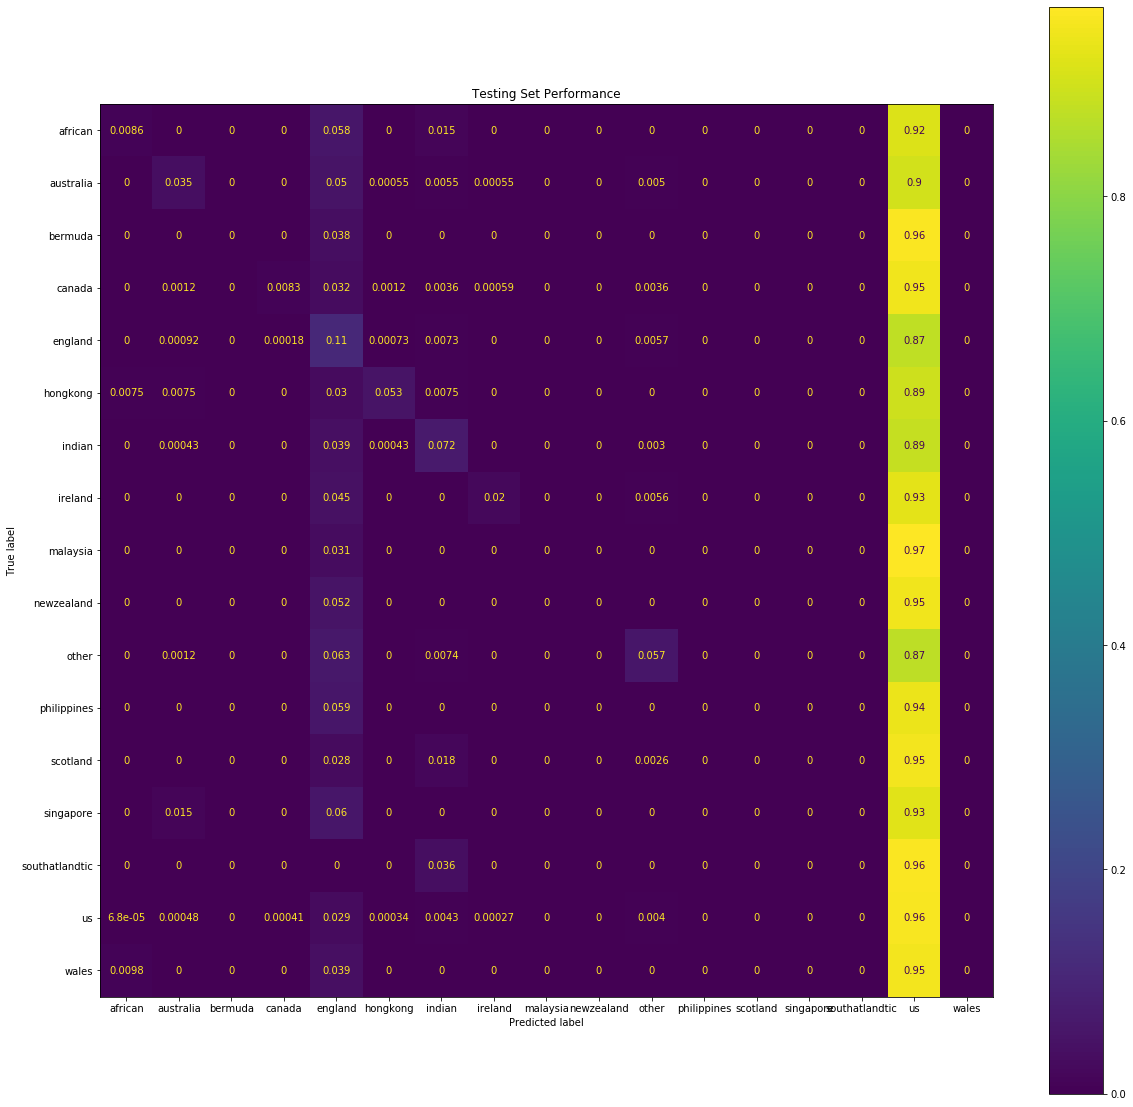

In [43]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=50, weights='distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)


Training Accuracy: 1.0
Validation Accuracy: 0.4960516146375886
Testing Accuracy: 0.502402634497127

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       465
           1       0.96      0.03      0.05      1817
           2       0.00      0.00      0.00        53
           3       1.00      0.00      0.00      1682
           4       0.43      0.06      0.11      5455
           5       0.44      0.03      0.06       133
           6       0.57      0.05      0.09      2323
           7       0.80      0.01      0.02       357
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       384
          10       0.58      0.04      0.08      1632
          11       0.00      0.00      0.00       135
          12       0.00      0.00      0.00       386
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00        

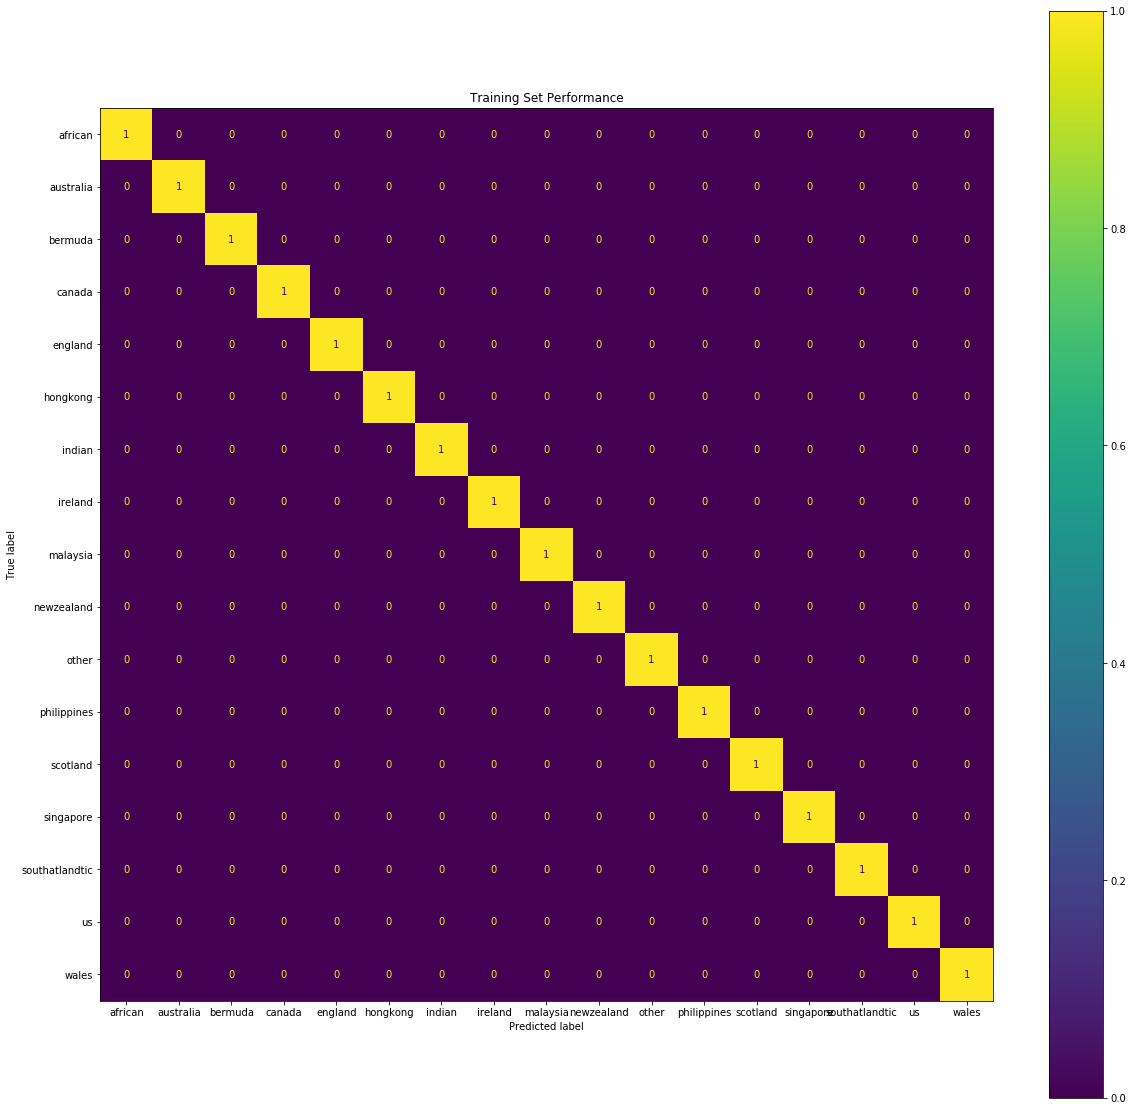

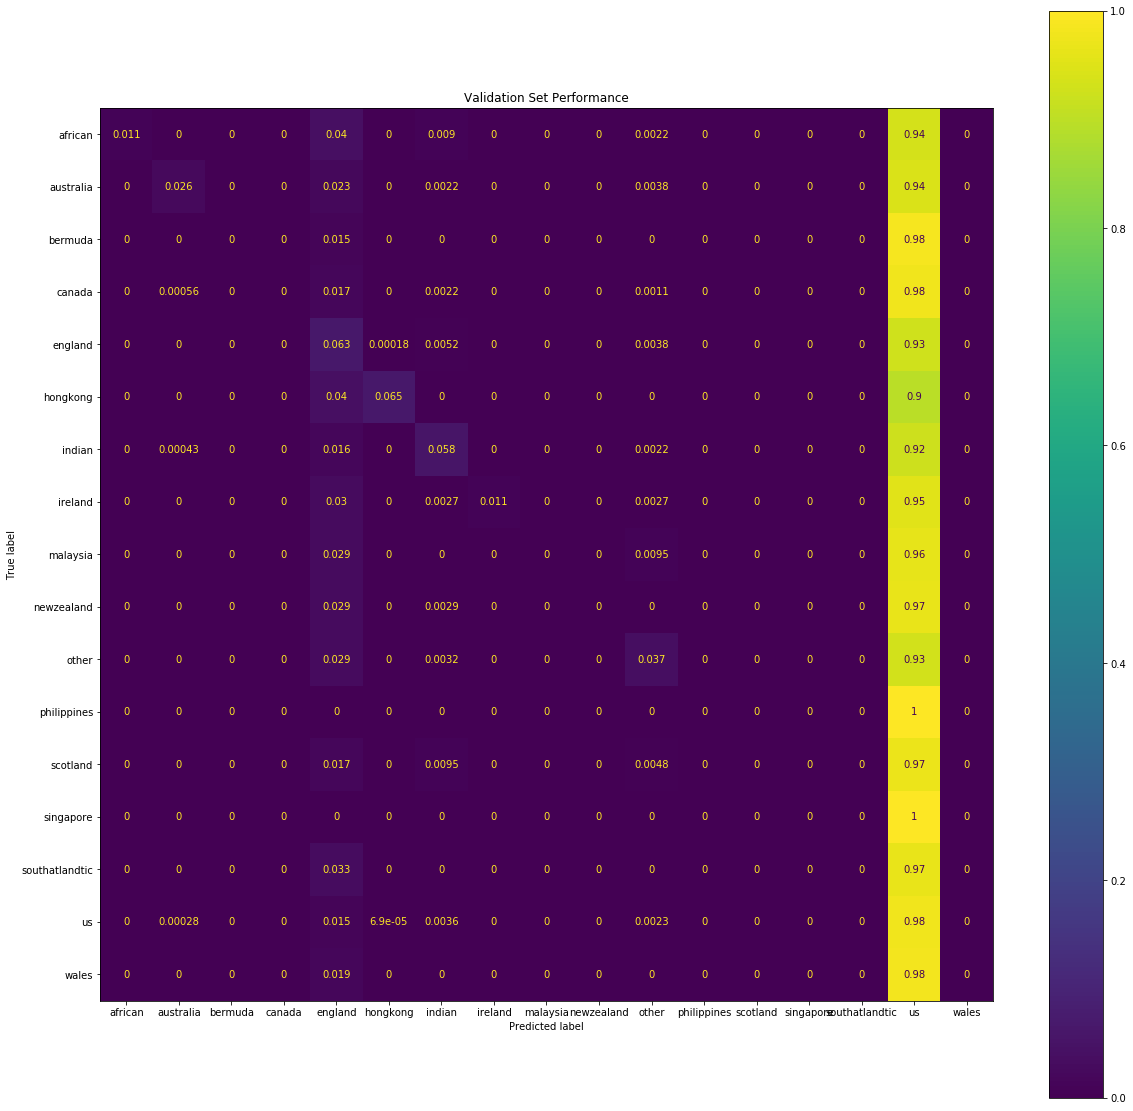

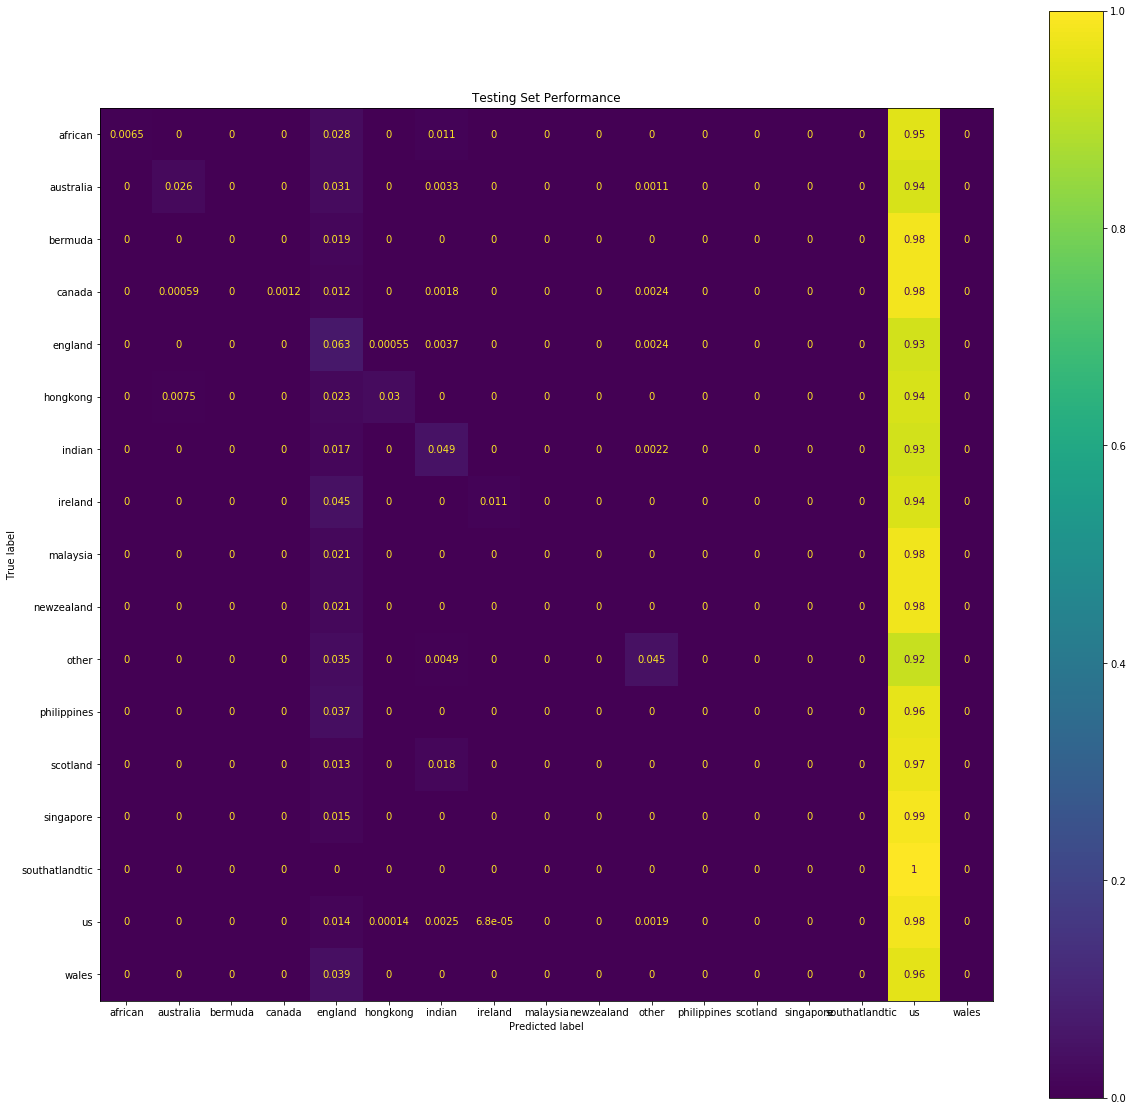

In [44]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=100, weights='distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)


In [45]:
#print('Classification Report on Testing Set \n')
#print(classification_report(y_test, cknn.predict(X_test)))

In [46]:
# Clearly we have class imbalance. This is because the US class has more than double the count of the other classes.
# If we set a maximum number of samples, we get a better result.
n_samples = 2000

X_train = np.array(X_train)
X_train2 = []
y_train2 = []
for i in range(17):
    samples = X_train[y_train == i]
    i_samples = min(n_samples, len(samples))
    X_train2.extend(samples[:i_samples])
    y_train2.extend([i] * i_samples)
X_train = np.array(X_train2)
y_train = np.array(y_train2)

Training Accuracy: 1.0
Validation Accuracy: 0.17873584461843475
Testing Accuracy: 0.1805840250008401

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.06      0.25      0.10       465
           1       0.13      0.22      0.16      1817
           2       0.03      0.09      0.05        53
           3       0.10      0.21      0.13      1682
           4       0.26      0.19      0.22      5455
           5       0.09      0.37      0.14       133
           6       0.19      0.29      0.23      2323
           7       0.05      0.21      0.08       357
           8       0.02      0.07      0.03        97
           9       0.05      0.20      0.07       384
          10       0.15      0.29      0.20      1632
          11       0.03      0.11      0.05       135
          12       0.05      0.22      0.08       386
          13       0.06      0.10      0.07        67
          14       0.00      0.00      0.00      

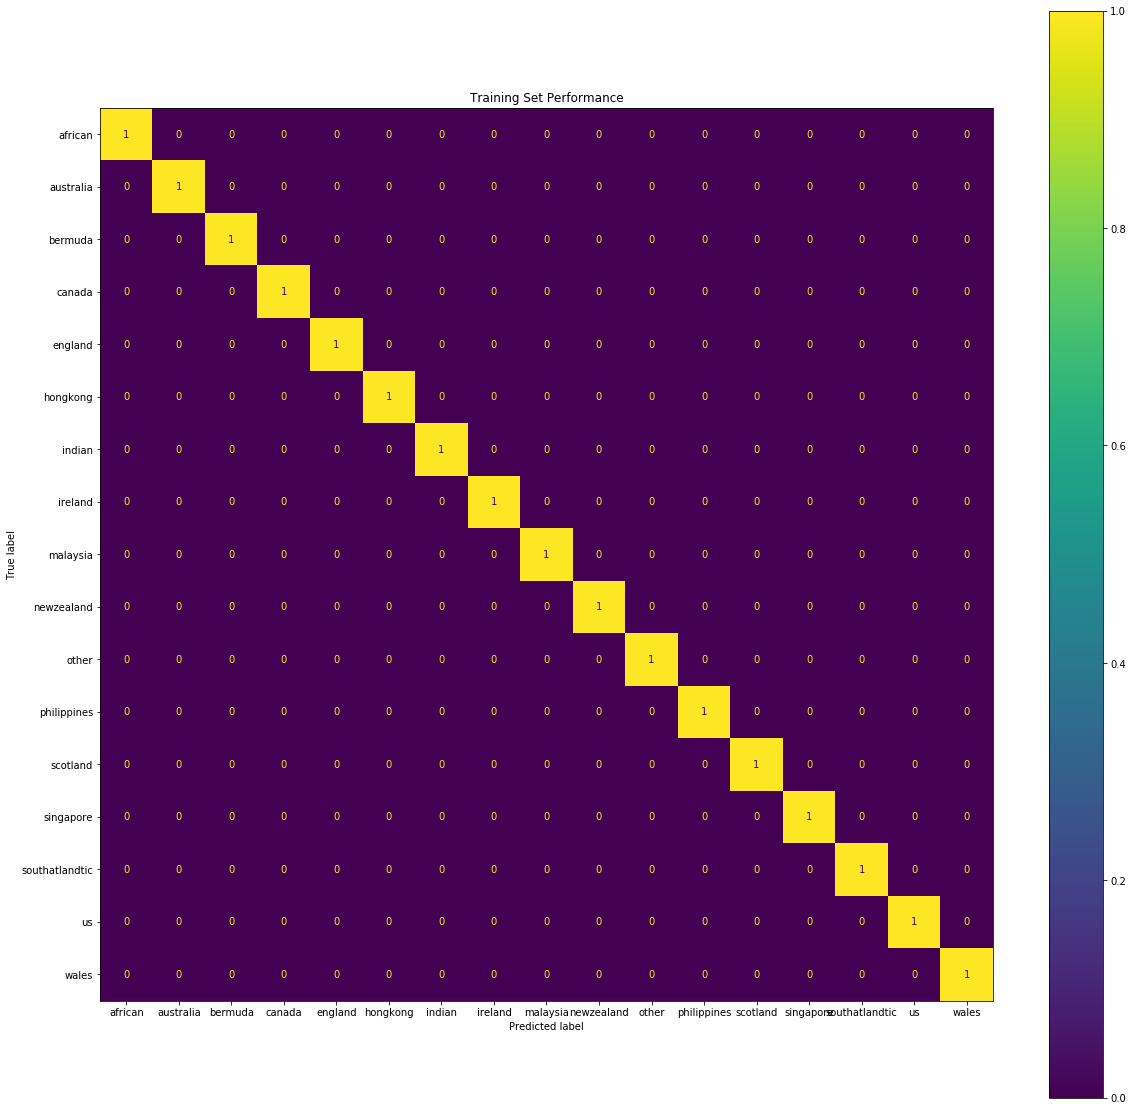

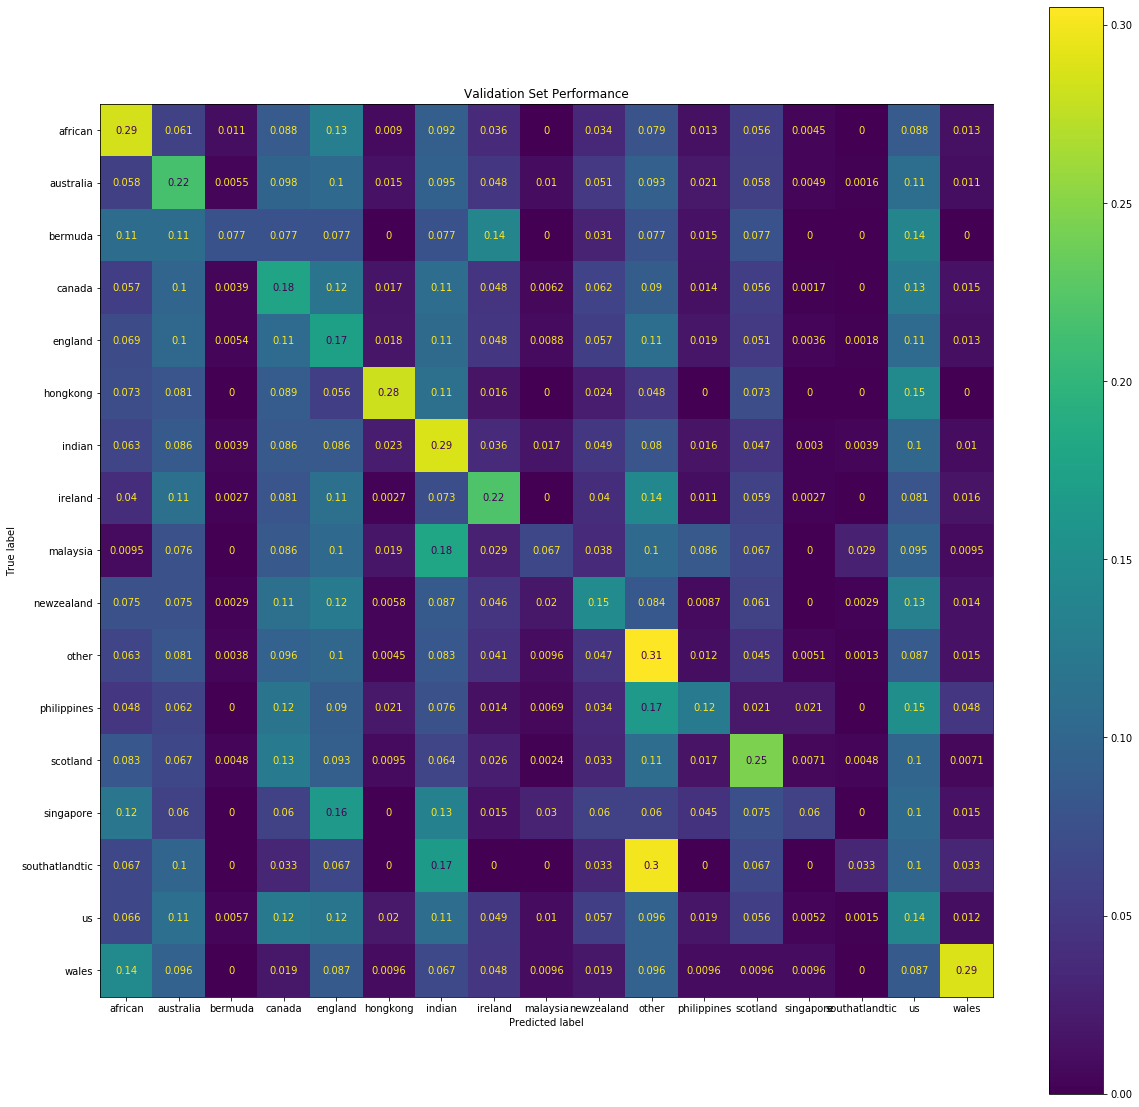

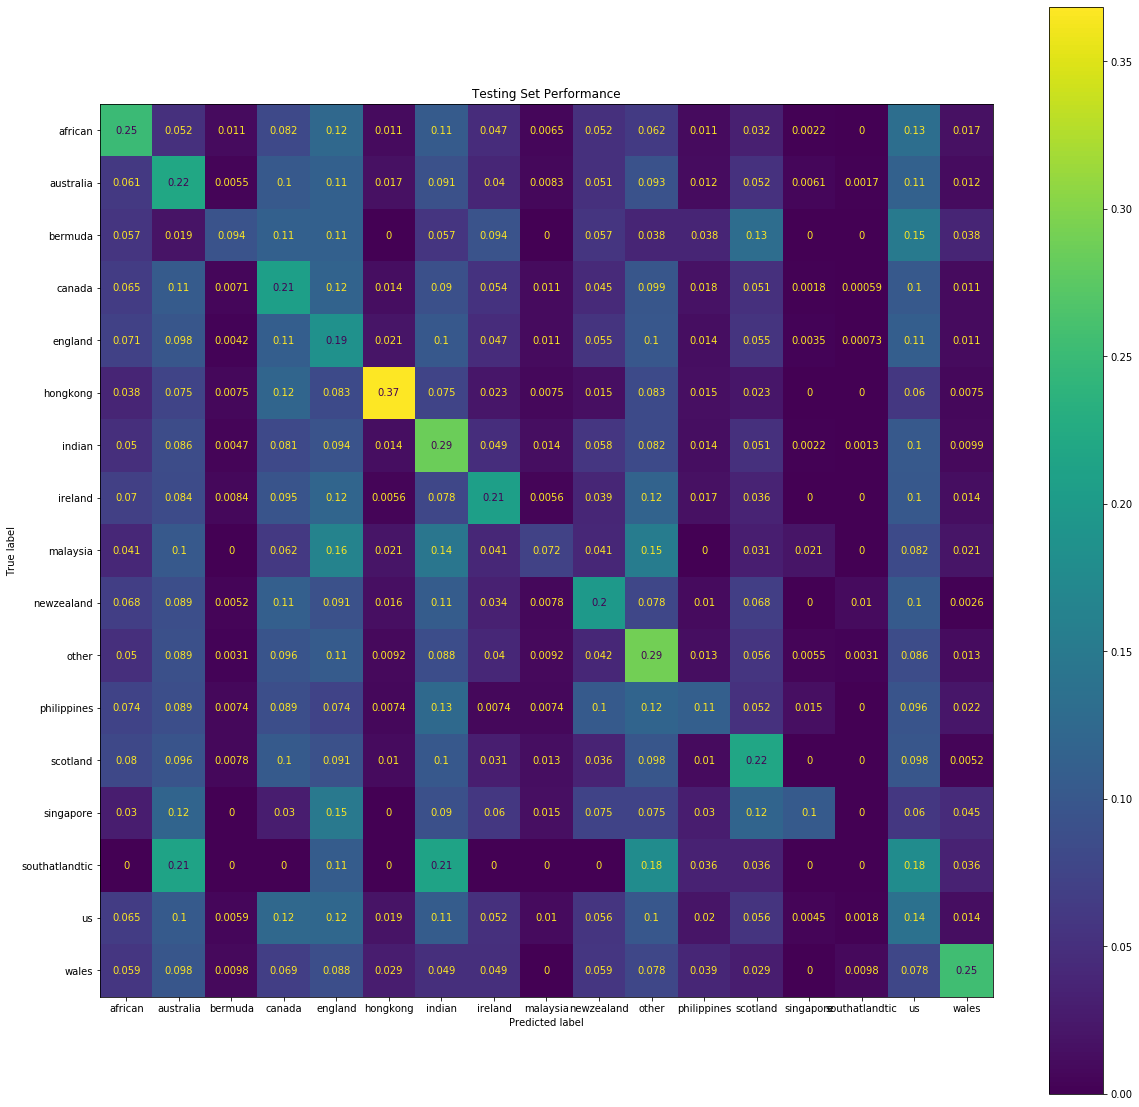

In [47]:
# Start with some basic parameters
cknn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)
#print('Classification Report on Testing Set \n')
#print(classification_report(y_test, cknn.predict(X_test)))

Training Accuracy: 1.0
Validation Accuracy: 0.19002654659094728
Testing Accuracy: 0.1897577203535065

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.06      0.25      0.10       465
           1       0.13      0.22      0.16      1817
           2       0.03      0.06      0.04        53
           3       0.09      0.20      0.13      1682
           4       0.26      0.19      0.22      5455
           5       0.10      0.38      0.15       133
           6       0.20      0.32      0.24      2323
           7       0.06      0.22      0.09       357
           8       0.03      0.05      0.04        97
           9       0.05      0.19      0.08       384
          10       0.15      0.33      0.20      1632
          11       0.04      0.11      0.05       135
          12       0.05      0.22      0.08       386
          13       0.09      0.06      0.07        67
          14       0.00      0.00      0.00      

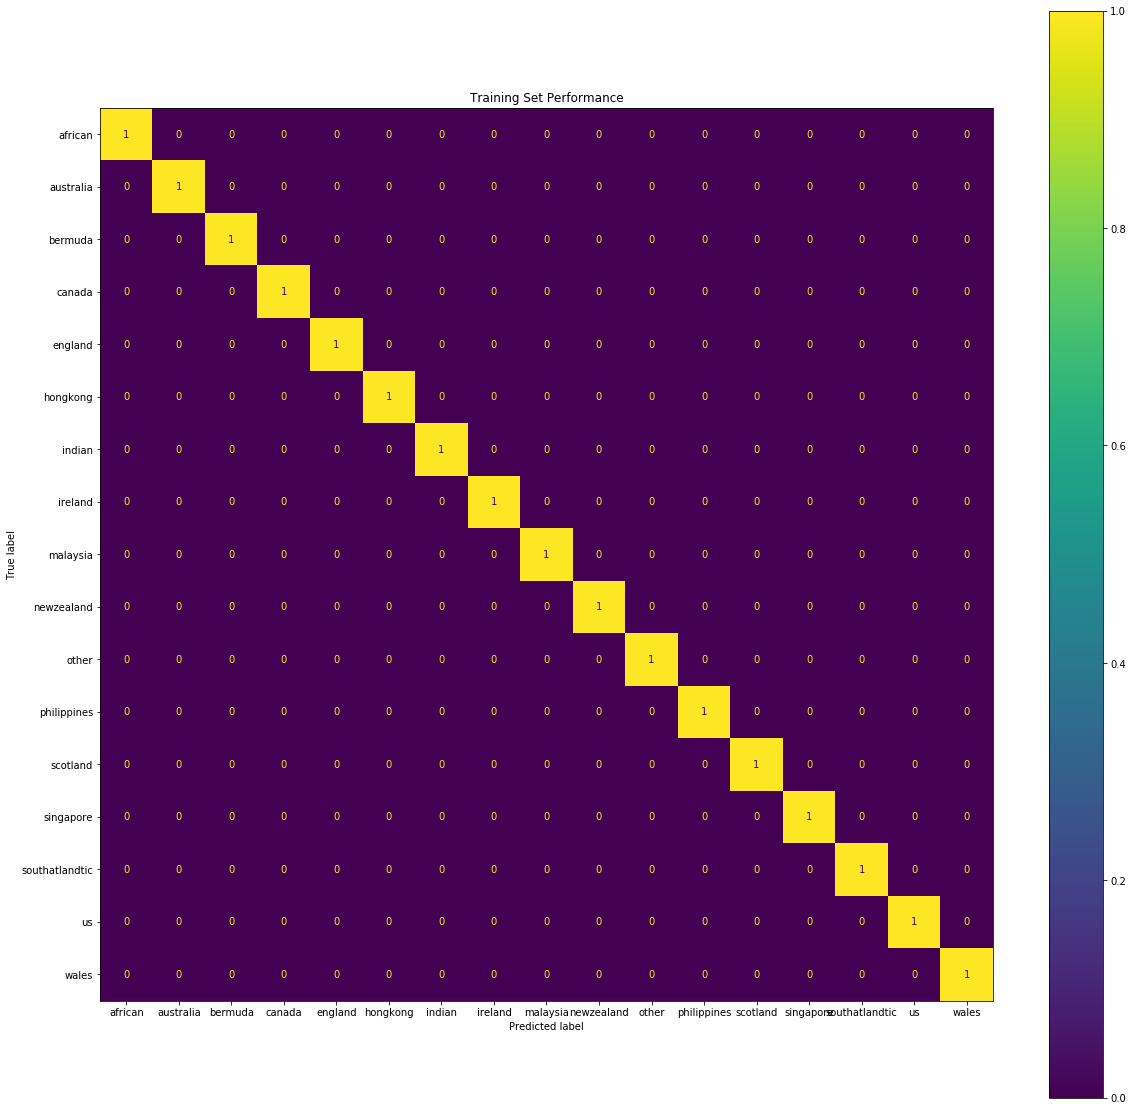

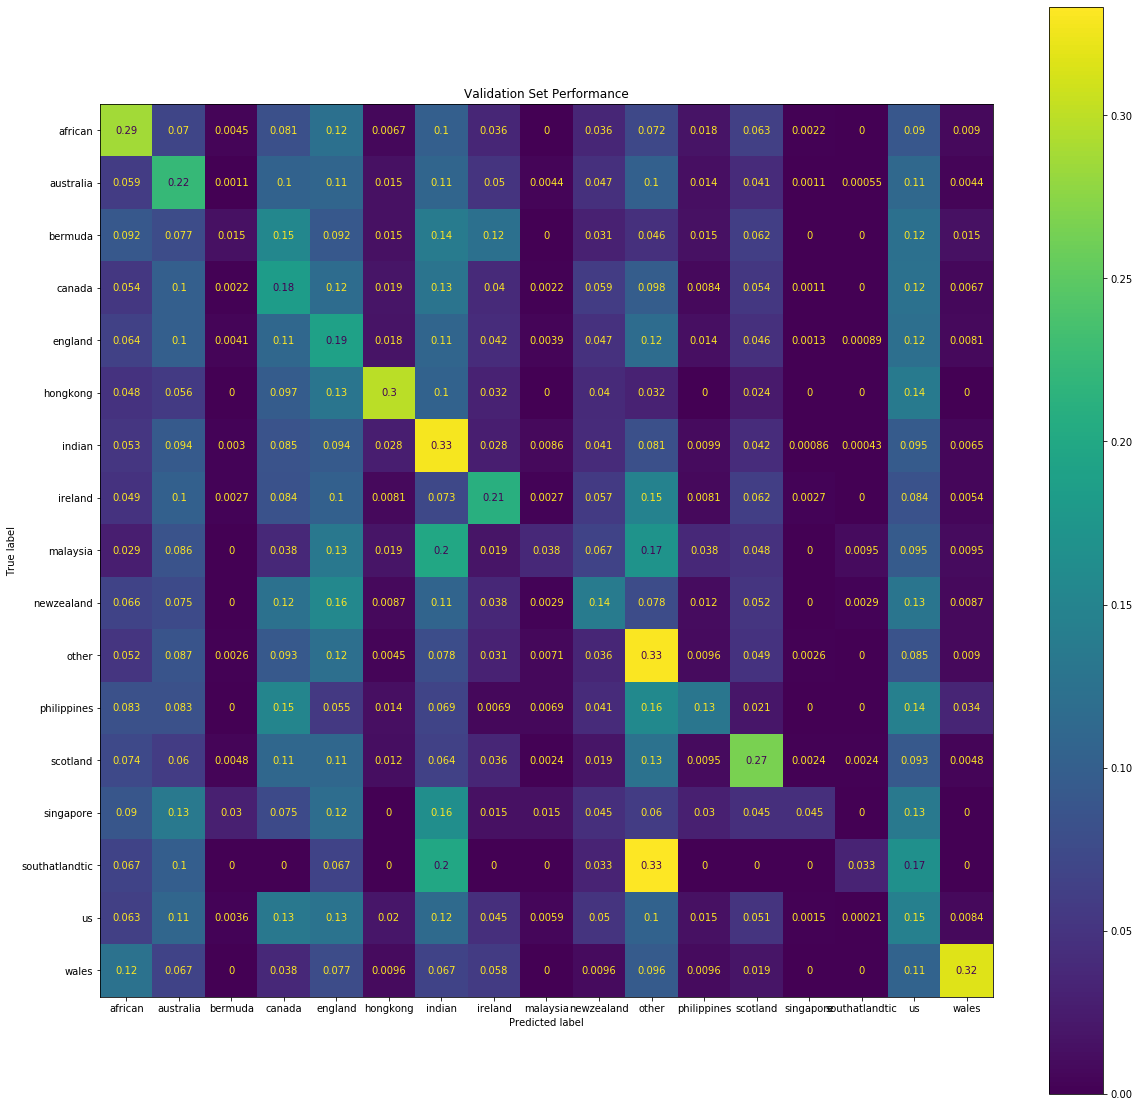

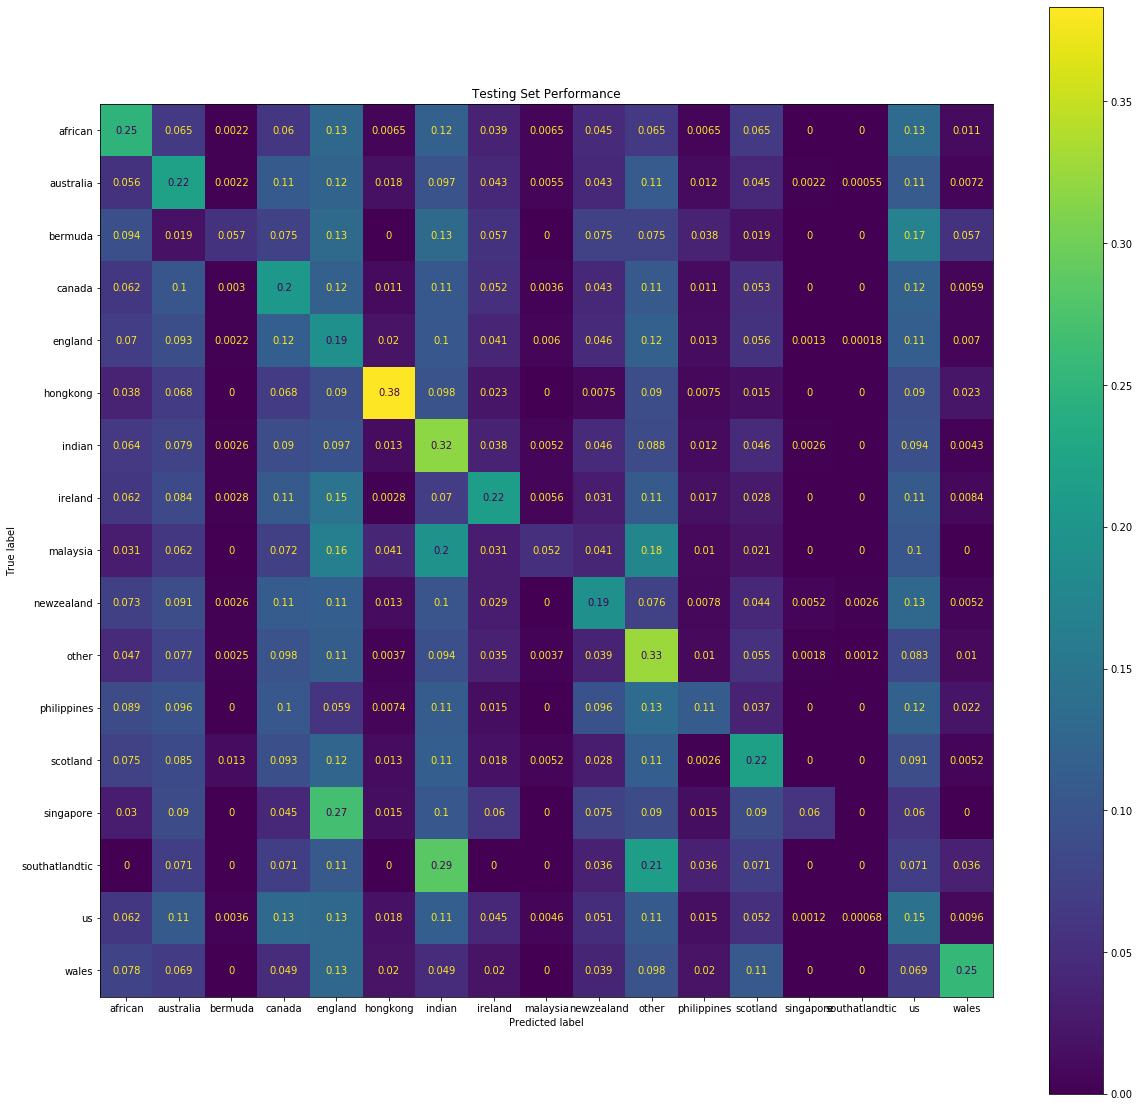

In [48]:
# Start with some basic parameters
cknn = KNeighborsClassifier(n_neighbors=10, weights = 'distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)
#print('Classification Report on Testing Set \n')
#print(classification_report(y_test, cknn.predict(X_test)))

# We can see that the accuracy is much lower, but the confusion matrices tell a different story. There is clearly a trend 
# over the diagonal, a trend we didn't have before.

Training Accuracy: 1.0
Validation Accuracy: 0.19550388117880305
Testing Accuracy: 0.19651197956920596

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.06      0.26      0.10       465
           1       0.13      0.21      0.16      1817
           2       0.01      0.02      0.02        53
           3       0.09      0.20      0.13      1682
           4       0.27      0.20      0.23      5455
           5       0.08      0.35      0.13       133
           6       0.19      0.35      0.25      2323
           7       0.07      0.20      0.10       357
           8       0.05      0.04      0.05        97
           9       0.04      0.15      0.07       384
          10       0.15      0.36      0.22      1632
          11       0.05      0.13      0.08       135
          12       0.06      0.21      0.09       386
          13       0.13      0.03      0.05        67
          14       0.00      0.00      0.00     

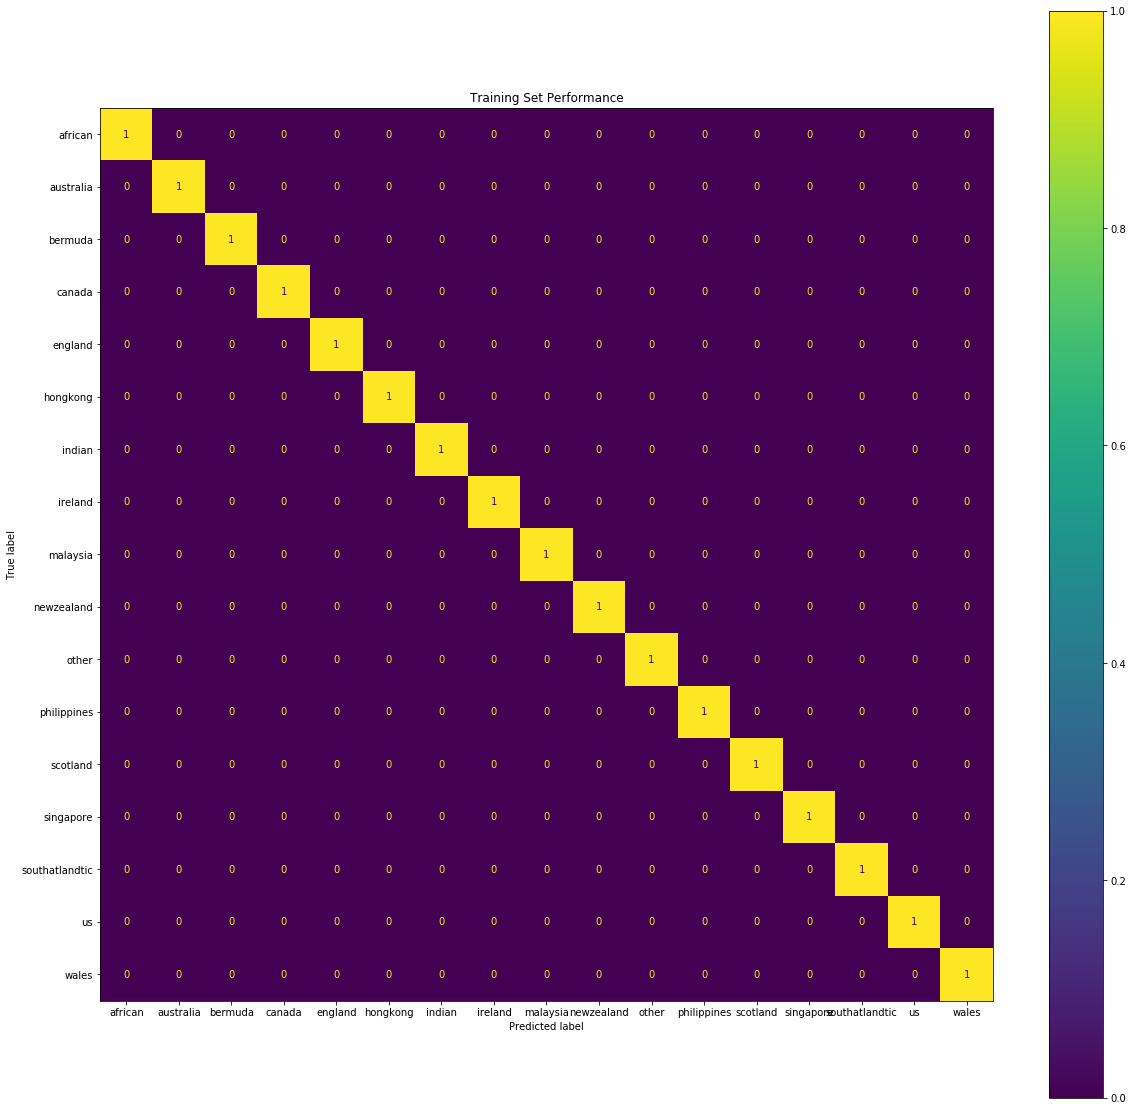

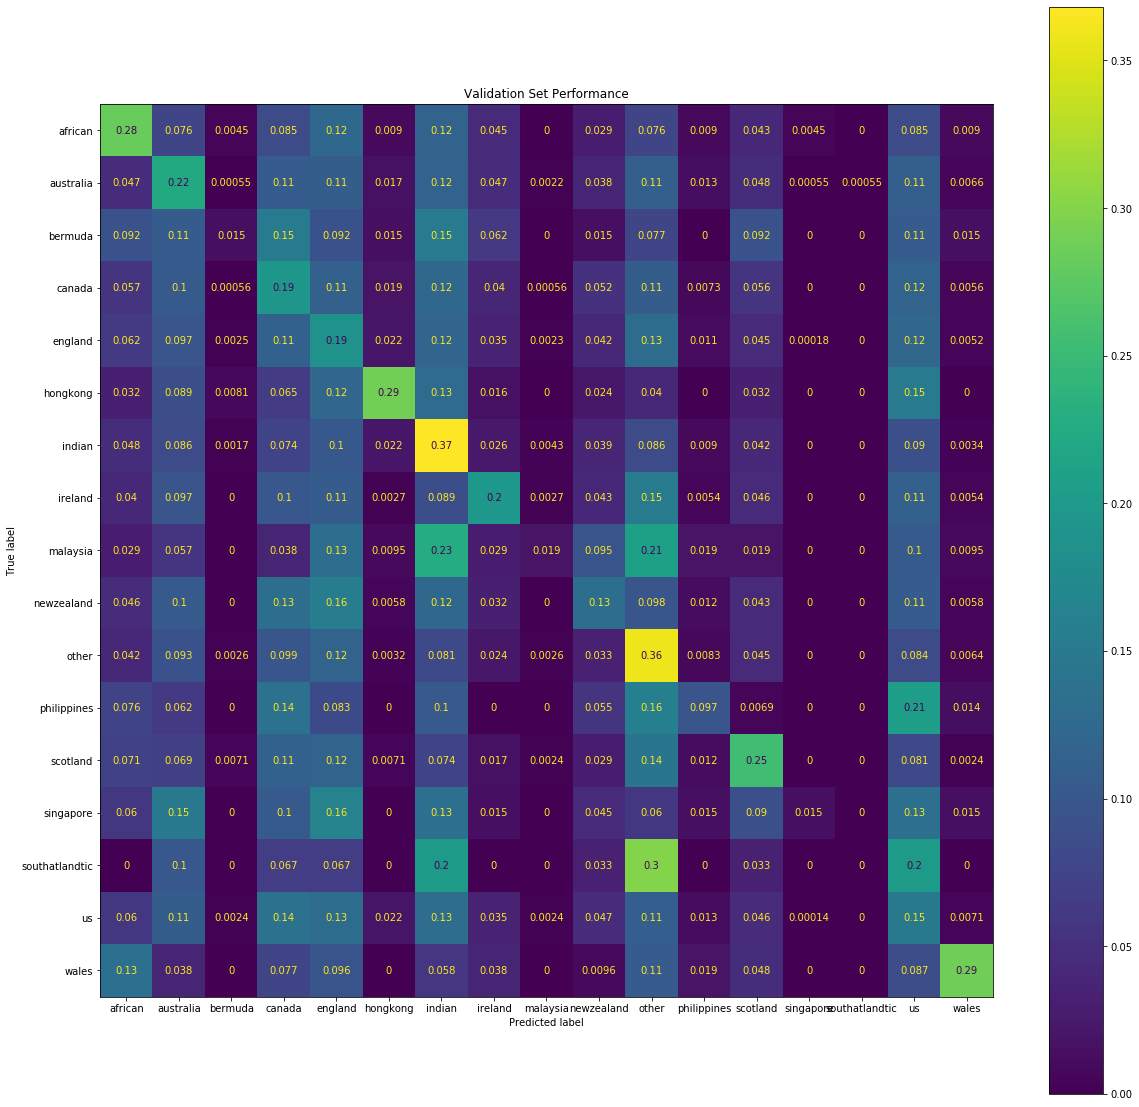

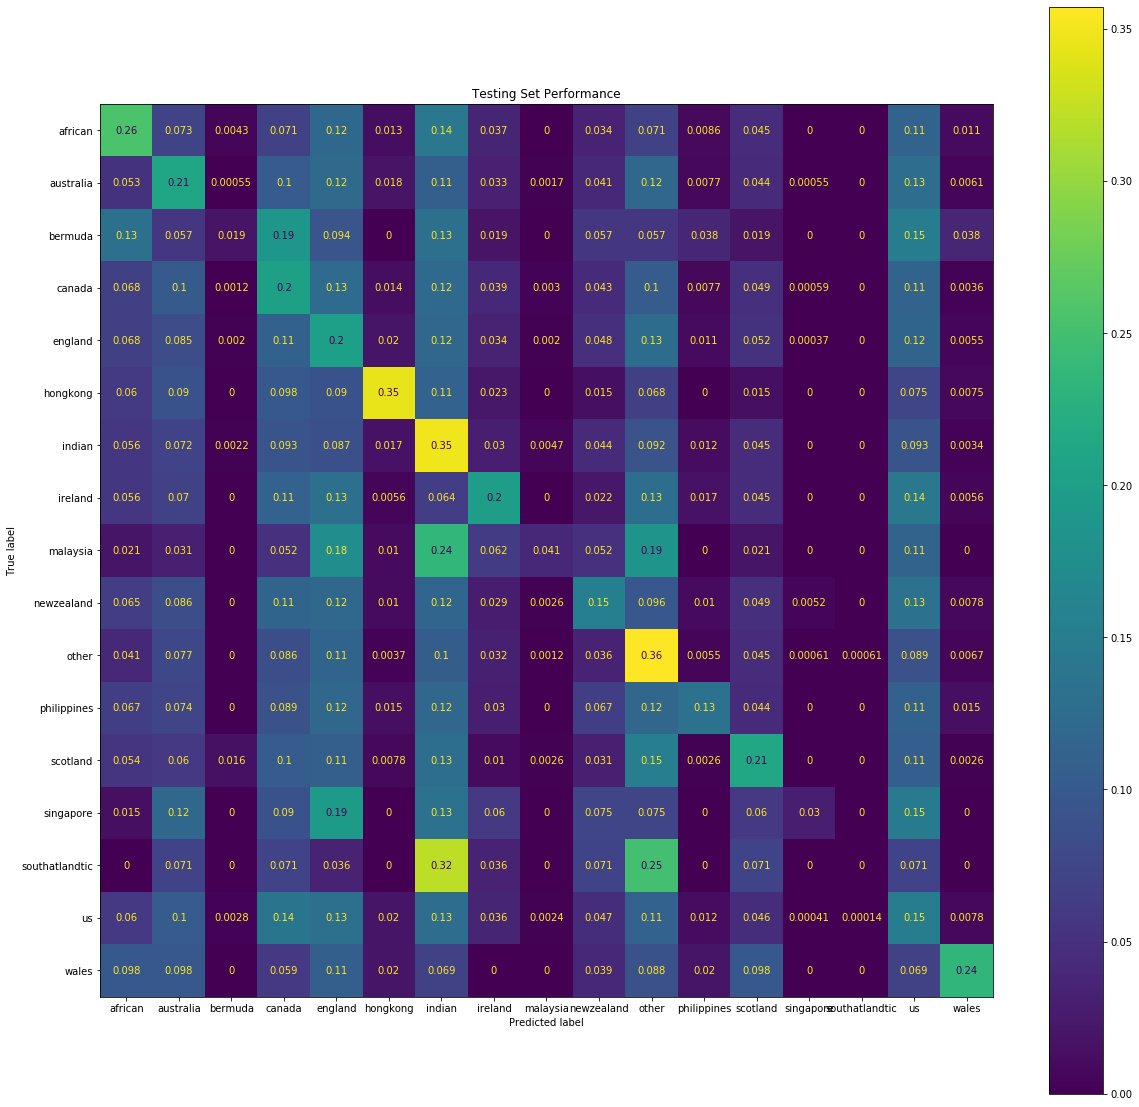

In [49]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=20, weights='distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)
#print('Classification Report on Testing Set \n')
#print(classification_report(y_test, cknn.predict(X_test)))

Training Accuracy: 1.0
Validation Accuracy: 0.19872979602809235
Testing Accuracy: 0.1929500319231157

Classification Report on Testing Set

              precision    recall  f1-score   support

           0       0.06      0.22      0.10       465
           1       0.12      0.19      0.15      1817
           2       0.02      0.02      0.02        53
           3       0.09      0.21      0.12      1682
           4       0.27      0.21      0.23      5455
           5       0.07      0.33      0.11       133
           6       0.18      0.40      0.25      2323
           7       0.08      0.16      0.10       357
           8       0.50      0.01      0.02        97
           9       0.04      0.11      0.06       384
          10       0.15      0.39      0.22      1632
          11       0.06      0.10      0.07       135
          12       0.06      0.17      0.08       386
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00      

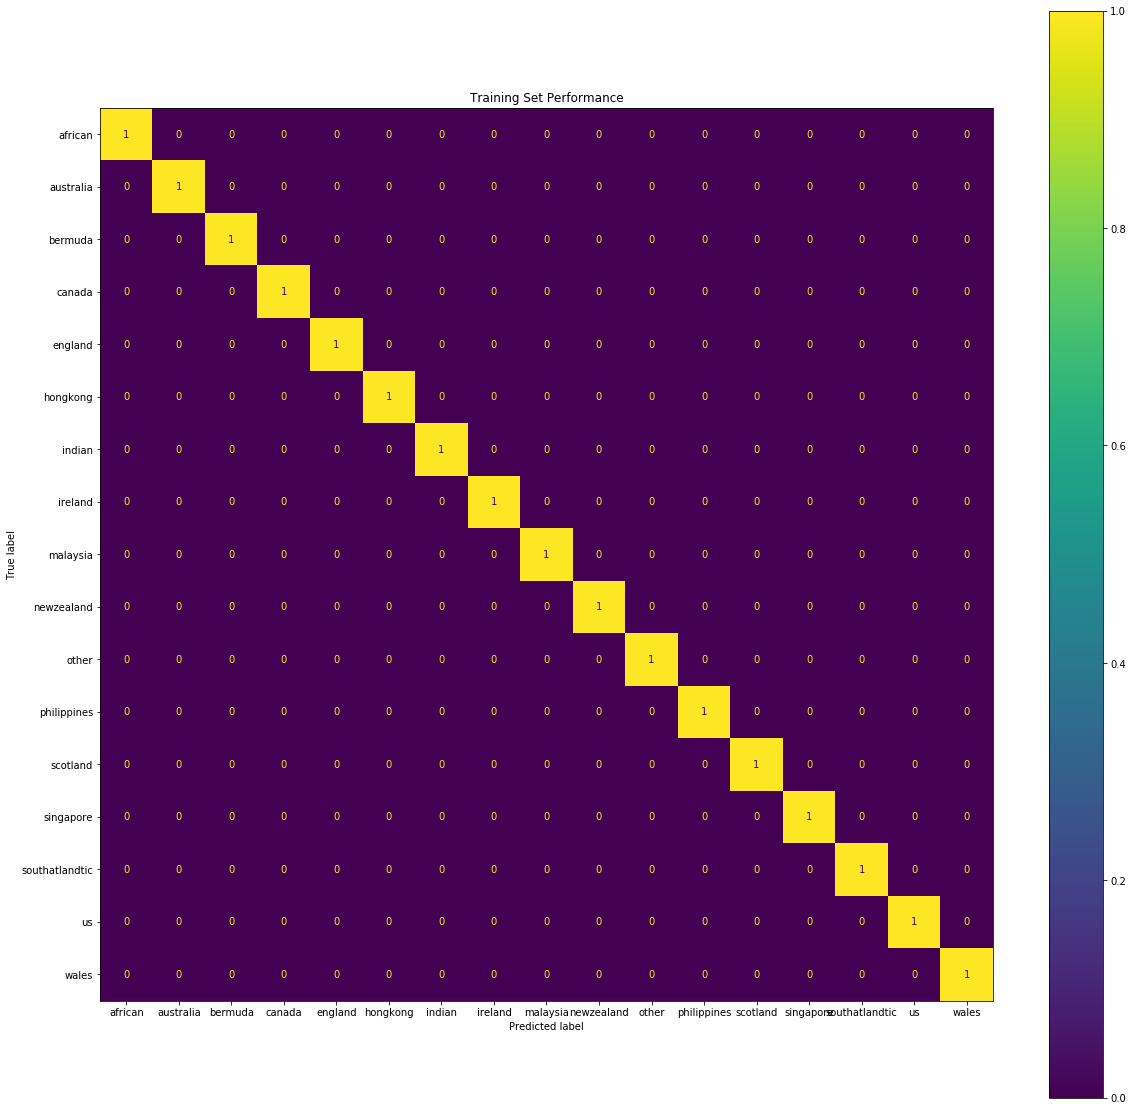

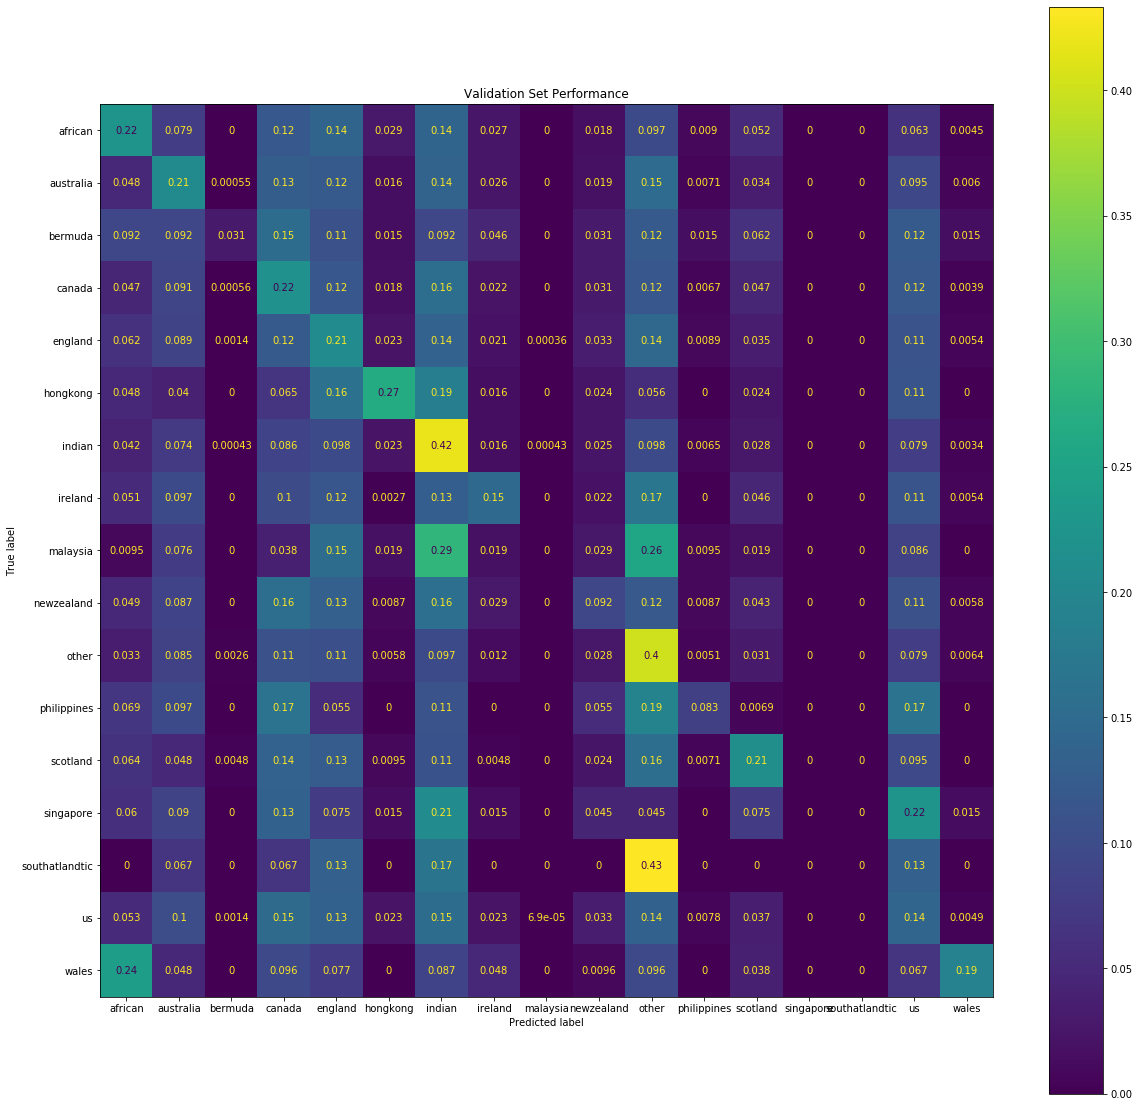

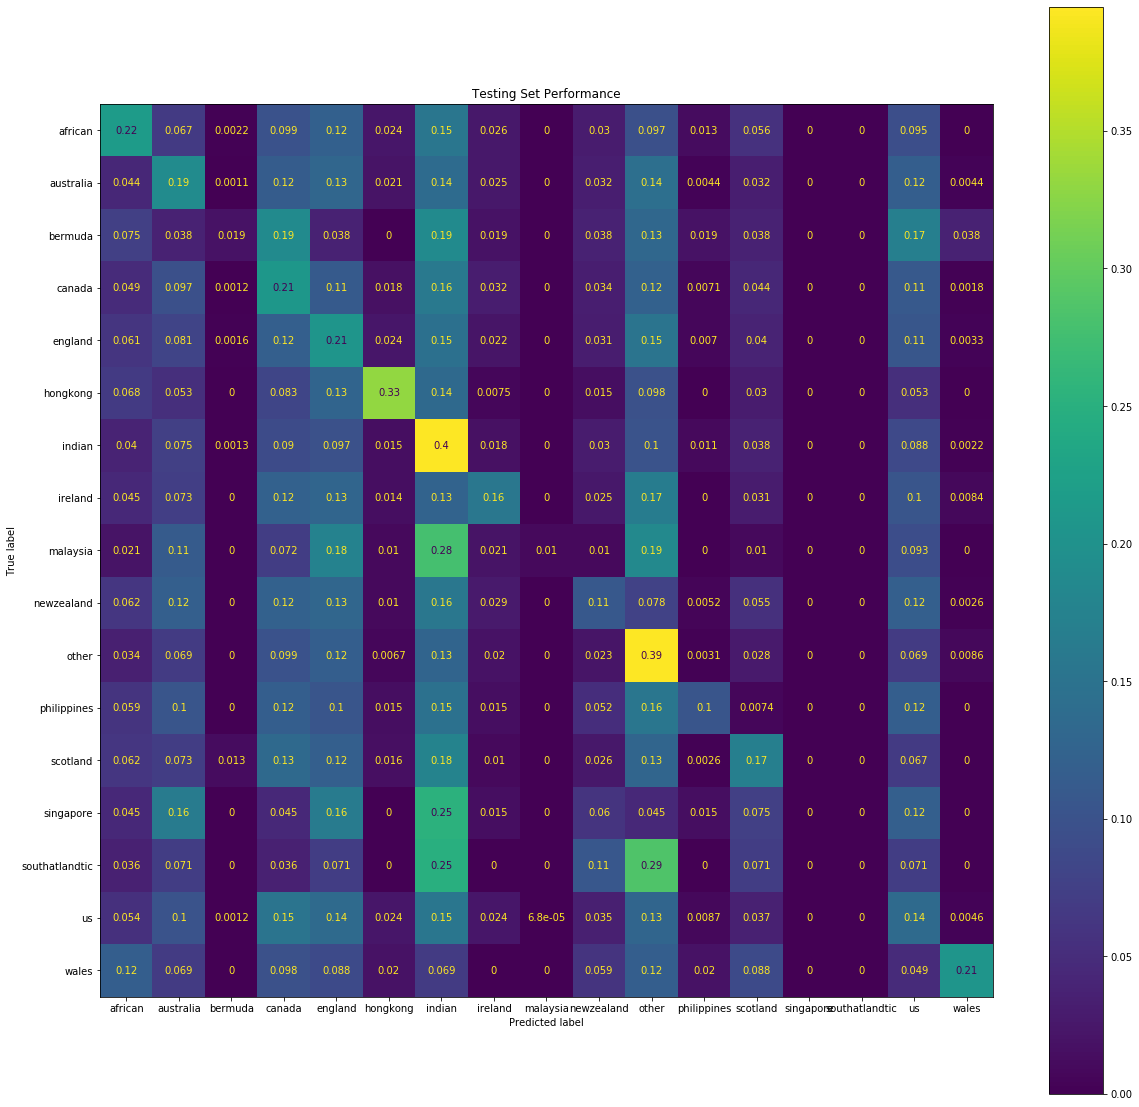

In [50]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=70, weights='distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test, labels)
#print('Classification Report on Testing Set \n')
#print(classification_report(y_test, cknn.predict(X_test)))